In [1]:
import numpy as np
import pickle
import open3d as o3d
from spatialmath import *
import transforms3d as t3d 

print('Previous test data position error')
e1 = np.array([0.02,12-11.87,0.07])
e2 = np.array([0.063,0.28,0.07])
e3 = np.array([12-12.34,-0.18,0.04])

print(np.linalg.norm(e1))
print(np.linalg.norm(e2))
print(np.linalg.norm(e3))


Previous test data position error
0.14899664425751408
0.29541326984412875
0.3867815921162742


In [2]:
file1 = open('EE_relative_base.pkl', 'rb')
file2 = open('tracked_robot_base.pkl', 'rb')
file3 = open('tracked_robot_EE.pkl', 'rb')

b_T_EEs = pickle.load(file1)
sb_T_trackedBs = pickle.load(file2)
sb_T_trackedEEs = pickle.load(file3)

In [3]:
#http://www.open3d.org/html/tutorial/Basic/transformation.html
#http://www.open3d.org/docs/latest/tutorial/Advanced/non_blocking_visualization.html

print('sb_T_trackedEE')
meshes = []
for transform in sb_T_trackedEEs:
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    meshes.append(mesh)
o3d.visualization.draw_geometries(meshes[:7])


sb_T_trackedEE


In [4]:
print('b_T_EE')
b_T_EE_meshes = []
for transform in b_T_EEs:
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    b_T_EE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_EE_meshes[:7])

b_T_EE


In [5]:
print('sb_T_trackedEE')
sb_T_trackedEE_meshes = []
for transform in sb_T_trackedEEs:
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    sb_T_trackedEE_meshes.append(mesh)
o3d.visualization.draw_geometries(sb_T_trackedEE_meshes[:7])

sb_T_trackedEE


In [267]:
print('b_T_trackedEE')
b_T_trackedEE_meshes = []
b_T_trackedEE_ts = []
b_T_trackedEEs = []
for i, transforms in enumerate(zip(sb_T_trackedBs, sb_T_trackedEEs, b_T_EEs)):
    sb_T_trackedB, sb_T_trackedEE, b_T_EE  = transforms
        
    sb_T_trackedB = SE3(sb_T_trackedB)
    sb_T_trackedEE = SE3(sb_T_trackedEE)
    b_T_trackedEE = sb_T_trackedB.inv()*sb_T_trackedEE
    b_T_trackedEE_ts.append(b_T_trackedEE.t)
    b_T_trackedEEs.append(b_T_trackedEE)
    
    diff = b_T_trackedEE-b_T_EE
    print('time step: {}, b_T_trackedEE vs b_T_EE norm: {}'.format(i,np.linalg.norm(diff)))
    
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(b_T_trackedEE)
    b_T_trackedEE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_trackedEE_meshes[:7])


b_T_trackedEE
time step: 0, b_T_trackedEE vs b_T_EE norm: 1.1215493724878604e-16
time step: 1, b_T_trackedEE vs b_T_EE norm: 2.842171048919517e-14
time step: 2, b_T_trackedEE vs b_T_EE norm: 7.105432439796868e-15
time step: 3, b_T_trackedEE vs b_T_EE norm: 3.480952077458736e-14
time step: 4, b_T_trackedEE vs b_T_EE norm: 1.4210856832784214e-14
time step: 5, b_T_trackedEE vs b_T_EE norm: 7.105435827925426e-15
time step: 6, b_T_trackedEE vs b_T_EE norm: 3.469446951953614e-18
time step: 7, b_T_trackedEE vs b_T_EE norm: 1.421085810333339e-14
time step: 8, b_T_trackedEE vs b_T_EE norm: 1.4210854715202004e-14
time step: 9, b_T_trackedEE vs b_T_EE norm: 7.105538794499274e-15
time step: 10, b_T_trackedEE vs b_T_EE norm: 1.4211290083467853e-14
time step: 11, b_T_trackedEE vs b_T_EE norm: 1.4211290083467853e-14


In [6]:
print('looking at rotation motions')
o3d.visualization.draw_geometries(b_T_trackedEE_meshes[8:])

looking at rotation motions


NameError: name 'b_T_trackedEE_meshes' is not defined

In [269]:
w_T_fkEEs = []

print('w_T_EE: origin')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: +x 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.289],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: -x 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.309],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: +y 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.804],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: -y 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.824],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: +z 10mm') #just swapped this with the one before, z should go up in the world frame not down!
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.174],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: -z 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.154],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)


print('showing as meshes in open3d')
w_T_fkEE_meshes = []
for transform in w_T_fkEEs:
    #print(transform)
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    w_T_fkEE_meshes.append(mesh)
o3d.visualization.draw_geometries(w_T_fkEE_meshes[:7])

w_T_EE: origin
  -0.9982    0.05799   0.01201  -299       
   0.05856   0.9968    0.05403  -1814      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: +x 10mm
  -0.9982    0.05799   0.01201  -289       
   0.05856   0.9968    0.05403  -1814      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: -x 10mm
  -0.9982    0.05799   0.01201  -309       
   0.05856   0.9968    0.05403  -1814      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: +y 10mm
  -0.9982    0.05799   0.01201  -299       
   0.05856   0.9968    0.05403  -1804      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: -y 10mm
  -0.9982    0.05799   0.01201  -299       
   0.05856   0.9968    0.05403  -1824      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: +z 10mm
  -0.9982    0.05799

In [270]:
from spatialmath.base import trnorm
print('b_T_fkEE')
b_T_fkEE_meshes = []
w_T_fkEE_ts = []
for w_T_fkEE in w_T_fkEEs:
    w_T_fkEE_ts.append(w_T_fkEE.t)

    w_T_b = np.array([[0.089, -0.043, 0.995, -0.21],
                      [0.991, 0.108, 0.084, -1.87],
                      [0.104, -0.993, 0.053, 0.98],
                      [0, 0, 0, 1]])
    w_T_b[:3,3]*=1000
    w_T_b = trnorm(w_T_b)  #hand typed in matrices aren't proper, det != 1
    w_T_b = SE3(w_T_b)
    b_T_fkEE = w_T_b.inv()*w_T_fkEE    
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(b_T_fkEE)
    b_T_fkEE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_fkEE_meshes[:7])

b_T_fkEE


[[-1.13764893e-02  9.99031056e-01  4.25150022e-02  1.81652157e+03]
 [ 6.92022276e-02  4.32024280e-02 -9.96666746e-01  1.03813528e+03]
 [-9.97537782e-01 -8.39643574e-03 -6.96266665e-02 -1.46758667e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Points A
[[  57.16827005 -221.0454809    85.69082476]
 [  57.05450516 -220.35345862   75.71544693]
 [  57.28203494 -221.73750317   95.66620258]
 [  67.15858061 -220.61345662   85.6068604 ]
 [  47.17795949 -221.47750518   85.77478911]
 [  57.59342007 -231.01214835   84.99455809]
 [  56.74312003 -211.07881344   86.38709142]]

Points B
[[  57.3119444  -221.1184821    85.70552275]
 [  57.18046008 -220.3381416    75.78432203]
 [  57.29073299 -221.72148281   95.59278708]
 [  67.50472448 -220.65249379   85.54366157]
 [  46.78834732 -221.4258365    85.84247807]
 [  57.54196275 -231.00931872   84.98778685]
 [  56.55971834 -211.05261076   86.37921494]]

RMSE: 0.23121476807525707
Hmm something doesn't look right ...


<IPython.core.display.Javascript object>


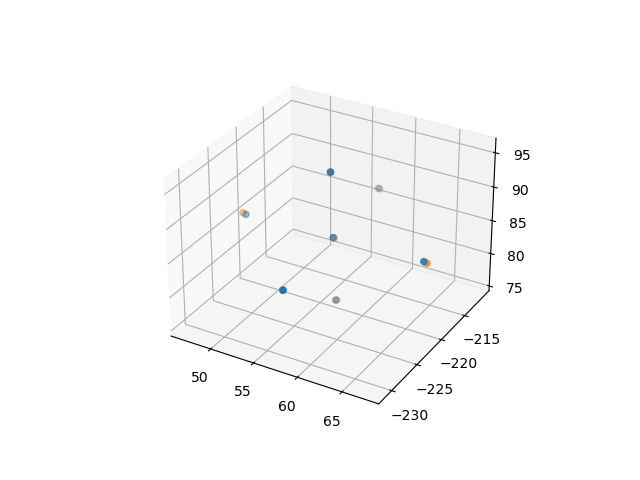

In [271]:
import numpy as np
from rigid_transform_3D import rigid_transform_3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib notebook


def find_base_transform_homogeneous(point_set_1, point_set_2):
    '''
    description: finds homogeneous base transform to transform point_set_1 to point_set_2
    
    
    input: two numpy arrays, shape is [nx3] 
    output: homogeneous transform (4x4) numpy array
    '''
    ret_R, ret_t = rigid_transform_3D(point_set_1.T, point_set_2.T)
    transform = np.eye(4)
    transform[:3,:3] = ret_R
    transform[:3,3] = ret_t.squeeze()
    
    return transform.copy()

source = np.array(w_T_fkEE_ts[:7])
target = np.array(b_T_trackedEE_ts[:7])
base_transform = find_base_transform_homogeneous(source,target)
print(base_transform)


source_stacked=np.hstack((source,np.ones(source.shape[0])[:, None]))
# Compare the recovered R and t with the original
source_transformed = (base_transform@source_stacked.T).T[:,:3]


# Find the root mean squared error
n = source_transformed.shape[0]
err = source_transformed - target
err = err * err
err = np.sum(err)
rmse = np.sqrt(err/n)

print("Points A")
print(source_transformed)
print("")

print("Points B")
print(target)
print("")

print("RMSE:", rmse)

if rmse < 1e-5:
    print("Everything looks good!")
else:
    print("Hmm something doesn't look right ...")
    
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(source_transformed[:,0], source_transformed[:,1], source_transformed[:,2], cmap='Greens');
ax.scatter3D(target[:,0], target[:,1], target[:,2], cmap='Greens');

In [272]:
from spatialmath.base import trnorm
print('b_T_fkEE')
b_T_fkEE_meshes = []
w_T_fkEE_ts = []
b_T_fkEEs = []
w_T_fkEE_meshes = []
for w_T_fkEE in w_T_fkEEs:
    w_T_fkEE_ts.append(w_T_fkEE.t)

#     w_T_b = np.array([[0.089, -0.043, 0.995, -0.21],
#                       [0.991, 0.108, 0.084, -1.87],
#                       [0.104, -0.993, 0.053, 0.98],
#                       [0, 0, 0, 1]])
#     w_T_b[:3,3]*=1000
    b_T_w = trnorm(base_transform)  #hand typed in matrices aren't proper, det != 1
    b_T_w = SE3(b_T_w)
    b_T_fkEE = b_T_w*w_T_fkEE*SE3.Rz(90,'deg')    
    b_T_fkEEs.append(b_T_fkEE)
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(b_T_fkEE)
    b_T_fkEE_meshes.append(mesh)
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(w_T_fkEE)
    w_T_fkEE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_fkEE_meshes)

b_T_fkEE


In [279]:
print('plotting FK and tracked b_T_ee')
o3d.visualization.draw_geometries(b_T_trackedEE_meshes[:7]+b_T_fkEE_meshes[:7])

# o3d.visualization.draw_geometries(b_T_trackedEE_meshes[:7])
# o3d.visualization.draw_geometries(b_T_fkEE_meshes[:7])

plotting FK and tracked b_T_ee


In [252]:
print('w_T_trackedEE')
w_T_trackedEE_meshes = []
w_T_trackedEEs = []
for i, transforms in enumerate(zip(sb_T_trackedBs, sb_T_trackedEEs, b_T_EEs)):
    sb_T_trackedB, sb_T_trackedEE, b_T_EE  = transforms
        
    sb_T_trackedB = SE3(sb_T_trackedB)
    sb_T_trackedEE = SE3(sb_T_trackedEE)
    b_T_trackedEE = sb_T_trackedB.inv()*sb_T_trackedEE
    
    trackedEE_T_fkEE = SE3.Rz(-90,'deg')*SE3.Rx(-2.4,'deg')*SE3.Ry(0.2,'deg')
    w_T_b = b_T_w.inv()
    w_T_trackedEE = w_T_b*b_T_trackedEE*trackedEE_T_fkEE
    w_T_trackedEEs.append(w_T_trackedEE)
    
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(w_T_trackedEE)
    w_T_trackedEE_meshes.append(mesh)
o3d.visualization.draw_geometries(w_T_trackedEE_meshes[:7])

w_T_trackedEE


In [253]:
o3d.visualization.draw_geometries(w_T_fkEE_meshes[:7]+w_T_trackedEE_meshes[:7])

In [254]:
def calc_p_error(p_target,p_current):
    """
    This function calucated the postion difference between target and where the robot is currently are.
    Args:
        p_target(np.array of 1x3 vector): the postion of the target desired
        p_current(np.array of 1x3 vector): the postion of the current robot
    Returns:
        error(np.array of 1x3 vector): the error in x,y,z deirection.
    """
    error = p_target.reshape((3,1))-p_current.reshape((3,1))
    return error

def calc_needle_ori_error(R_target, R_current):
    '''
    calculates axis-angle between target and current rotation matrices for robot EE control
    inputs:
        R_target: [3x3] SO3 rotation matrix numpy array for target rotation matrix
        R_current: [3x3] SO3 rotation matrix numpy array for current rotation matrix
    returns:
        [3x1] axis-angle orientation error where the magnitude is the rotation in radians around the axis
    '''
    target_vec = R_target[:,2]
    current_vec = R_current[:,2]
    normal = np.cross(target_vec, current_vec)
    normal /= np.linalg.norm(normal)
    projected = target_vec @ current_vec / (np.linalg.norm(target_vec)*np.linalg.norm(current_vec))
    angle = -np.arccos(projected).squeeze()
    axis = normal.squeeze()
    return axis*angle



In [255]:
print('marker base frame error: ')
for i, transforms in enumerate(zip(b_T_fkEEs, b_T_trackedEEs)):
    b_T_trackedEE, b_T_fkEE  = transforms
    p_error = calc_p_error(b_T_fkEE.t,b_T_trackedEE.t)
    ori_needle_error = calc_needle_ori_error(b_T_fkEE.R,b_T_trackedEE.R)
    ori_euler_error = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))
    #print("Postion Error vector(mm): ", p_error)
    print('Time step: {}'.format(i))
    print("Postion Error norm (mm): ", np.linalg.norm(p_error))
    print("Rotational Error norm(deg): ", np.linalg.norm(ori_needle_error)*180/np.pi)


marker base frame error: 
Time step: 0
Postion Error norm (mm):  0.16182560728338707
Rotational Error norm(deg):  2.344443392880199
Time step: 1
Postion Error norm (mm):  0.14437116135372366
Rotational Error norm(deg):  2.4187509364727076
Time step: 2
Postion Error norm (mm):  0.07564485466657499
Rotational Error norm(deg):  2.3911647865079577
Time step: 3
Postion Error norm (mm):  0.3540248182687083
Rotational Error norm(deg):  2.3997339934836943
Time step: 4
Postion Error norm (mm):  0.3988095991928378
Rotational Error norm(deg):  2.3823280574153185
Time step: 5
Postion Error norm (mm):  0.051978003380585794
Rotational Error norm(deg):  2.2651556737886906
Time step: 6
Postion Error norm (mm):  0.18543138406904872
Rotational Error norm(deg):  2.3529044597767785


In [256]:
print('robot world frame error: ')
for i, transforms in enumerate(zip(w_T_fkEEs, w_T_trackedEEs)):
    w_T_fkEE, w_T_trackedEE  = transforms
    #deltaR = SE3.Rx(2.4,'deg')*SE3.Ry(-0.2,'deg')
    #w_T_trackedEE *= deltaR
    p_error = calc_p_error(w_T_fkEE.t,w_T_trackedEE.t)
    ori_needle_error = calc_needle_ori_error(w_T_fkEE.R,w_T_trackedEE.R)
    ori_euler_error = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))
    #print("Postion Error vector(mm): ", p_error)
    print('Time step: {}'.format(i))
    print("Postion Error norm (mm): ", np.linalg.norm(p_error))
    print("Rotational Error norm(deg): ", np.linalg.norm(ori_needle_error)*180/np.pi)

file = open('w_T_b.pkl', 'wb')
pickle.dump(w_T_b, file)
file.close()
file = open('trackedEE_T_fkEE.pkl', 'wb')
pickle.dump(trackedEE_T_fkEE, file)
file.close()


robot world frame error: 
Time step: 0
Postion Error norm (mm):  0.16182560728360562
Rotational Error norm(deg):  0.08554873642634403
Time step: 1
Postion Error norm (mm):  0.14437116135379463
Rotational Error norm(deg):  0.0925764329812896
Time step: 2
Postion Error norm (mm):  0.07564485466661311
Rotational Error norm(deg):  0.017581518911101112
Time step: 3
Postion Error norm (mm):  0.3540248182690572
Rotational Error norm(deg):  0.046555795120888255
Time step: 4
Postion Error norm (mm):  0.39880959919274134
Rotational Error norm(deg):  0.06188484579757985
Time step: 5
Postion Error norm (mm):  0.05197800338061223
Rotational Error norm(deg):  0.14661032705876206
Time step: 6
Postion Error norm (mm):  0.1854313840686647
Rotational Error norm(deg):  0.07340758362479188


In [281]:
w_T_tn_mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(w_T_tn[-1])

file4 = open('FK_robot_tip.pkl', 'rb')
w_T_tn = pickle.load(file4)

o3d.visualization.draw_geometries([w_T_tn_mesh])